In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#datos electricos para stepper grande

Polos=100 #Numero de polos
K=8/(1300*np.pi/30) #Constante de motor [V*s] [N*m/A]
print(K)

#frecuencias probadas en puente de impedancias
f_prueba=np.array([500, 1000, 5000, 10000])

#Resistencias internas medidas
R_i_1=np.array([9.5, 17.03, 118.5, 298]) #[Ohm]
R_i_2=np.array([10.15, 17.85, 119.4, 299]) #[Ohm]
R_i=(R_i_1+R_i_2)/2

#Inductancias internas medidas
L_i_1=np.array([16.824, 17.053, 14.384, 12.441])*1e-3 #[H]
L_i_2=np.array([17.609, 17.197, 14.297, 12.366])*1e-3 #[H]
L_i=(L_i_1+L_i_2)/2
L_ilog=np.log10(L_i)
f_pruebalog=np.log10(f_prueba)

#Ajuste para resistencia interna en función de la frecuencia
Poly_f_R=np.polyfit(f_prueba,R_i,2)
R_poly=lambda f: np.polyval(Poly_f_R,f)

#Ajuste para inductancia interna en función de la frecuencia
Poly_f_L=np.polyfit(f_pruebalog,L_ilog,2)
L_poly=lambda f: 10**np.polyval(Poly_f_L,np.log10(f))

#Variables independientes  qutas todas
rpm=np.linspace(500,5000,200)
R_carga=np.logspace(0,3,200)
(RPM,R_L)=np.meshgrid(rpm,R_carga)

"""
#ESTE PEDAZO de código lo pones en el de los datos de laboratorio

#Variables independientes
RPM=4000 #Velocidad del motor constante
R_L=np.linspace(Ra,Rb,100)  #Vector de resitencias de carga completas

#Acá inserta el modelo matemático de abajo

#Luego se plotea lo que necesites por ejemplo así

plt.plot(R_L,S_L) #Datos teoricos
plt.plot(fase1["R_L"],fase1["P_L"],label="Fase 1") #Datos experimentales
plt.plot(fase2["R_L"],fase2["P_L"],label="Fase 2")
plt.show()
"""

#Revisa bien este pedazo porfa
f_rp=2*Polos*RPM/120 #frecuencia electrica
omega=2*np.pi*f_rp/60 #Vel angular eje
omega_e=omega*Polos/2 #omega electrica
#hasta aca

X_tot=R_L+R_poly(f_rp)+omega_e*L_poly(f_rp)*1j #Impedancia total
X_L=R_L #Impedancia de carga
E_A=K*np.pi*f_rp/30 #Fuente ideal interna (creo acá está mal deberia ser omega del eje)
S_tot=np.abs(E_A)**2/np.conj(X_tot) #Potencia total entregada
V_L=E_A*X_L/X_tot #Voltaje en la carga
S_L=np.abs(V_L)**2/np.conj(X_L) #Potencia en la carga por fase
FP=np.cos(np.angle(S_tot)) #Factor de potencia
I_A=E_A/X_tot #Corriente de fase
T_motor=np.abs(I_A)*FP*K #Torque de motor
P_in=2*omega*T_motor #Potencia de entrada
#n_tot=2*np.real(S_tot)/P_in
n_L=2*np.real(S_L)/P_in

0.058764902064699816


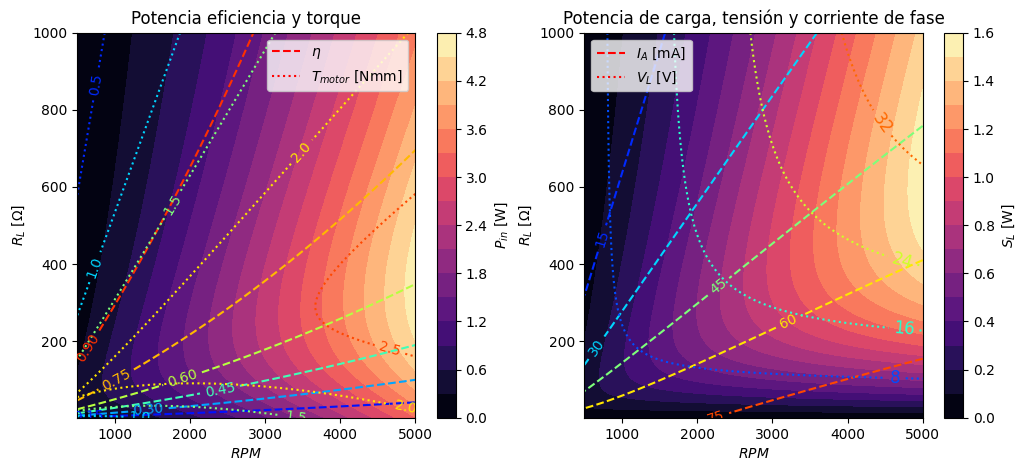

In [ ]:
import matplotlib.patches as mpatches  # Import for creating proxy artists

# Create a figure and a set of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot the first contour plot on the first subplot (axes[0])
contour1 = axes[0].contourf(RPM, R_L, P_in, 15, cmap="magma")
fig.colorbar(contour1, ax=axes[0], label=r'$P_{in}$ [W]')  # Colorbar for filled contour
contour2 = axes[0].contour(RPM, R_L, n_L, 6, cmap="jet", linestyles='dashed')
axes[0].clabel(contour2, inline=True, fontsize=10)  # Add labels to contour lines (n_L)
contour3 = axes[0].contour(RPM, R_L, T_motor*1e3, 4, cmap="jet", linestyles='dotted')
axes[0].clabel(contour3, inline=True, fontsize=10)  # Add labels to contour lines (T_motor)

# Create proxy artists for the legend
proxy2 = plt.Line2D([0], [0], color='red', linestyle='dashed', label=r'$\eta$')  # Proxy for n_L contour lines
proxy3 = plt.Line2D([0], [0], color='red', linestyle='dotted', label=r'$T_{motor}$ [Nmm]')  # Proxy for T_motor contour lines

# Add the legend to the first subplot
axes[0].legend(handles=[proxy2, proxy3], loc='upper right')
axes[0].set_title("Potencia eficiencia y torque")
axes[0].set_xlabel(r'$RPM$')
axes[0].set_ylabel(r'$R_L$ [$\Omega$]')

# Plot the second contour plot on the second subplot (axes[1])
contour4 = axes[1].contourf(RPM, R_L, np.real(S_L), 15, cmap="magma")
fig.colorbar(contour4, ax=axes[1], label=r'$S_L$ [W]')  # Colorbar for filled contour
contour5 = axes[1].contour(RPM, R_L, 1e3*np.abs(I_A), 5, cmap="jet", linestyles='dashed')
axes[1].clabel(contour5, inline=True, fontsize=10)  # Add labels to contour lines (|I_A|)
contour6 = axes[1].contour(RPM, R_L, np.abs(V_L), 5, cmap="jet", linestyles='dotted')
axes[1].clabel(contour6, inline=True, fontsize=12)  # Add labels to contour lines (|V_L|)

# Create proxy artists for the legend
#proxy4 = mpatches.Patch(color='plasma', label=r'$P_{out}$ [VA]')  # Proxy for filled contour
proxy5 = plt.Line2D([0], [0], color='red', linestyle='dashed', label=r'$I_A$ [mA]')  # Proxy for |I_A| contour lines
proxy6 = plt.Line2D([0], [0], color='red', linestyle='dotted', label=r'$V_L$ [V]')  # Proxy for |V_L| contour lines

# Add the legend to the second subplot
axes[1].legend(handles=[proxy5, proxy6], loc='upper left')
axes[1].set_title("Potencia de carga, tensión y corriente de fase")
axes[1].set_xlabel(r'$RPM$')
axes[1].set_ylabel(r'$R_L$ [$\Omega$]')

plt.show()

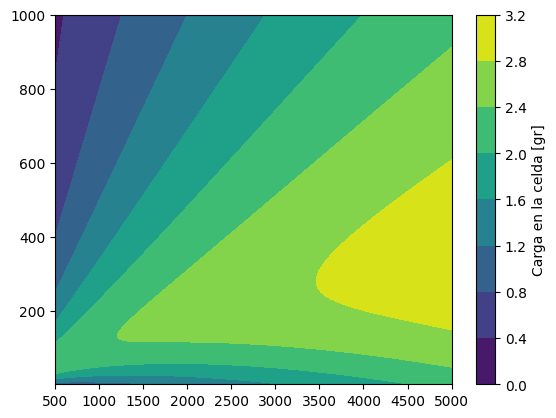

In [ ]:
peso=T_motor/(0.09*9.81)*1000

plt.contourf(RPM,R_L,peso)
plt.colorbar(label="Carga en la celda [gr]")

0.01897713485062685


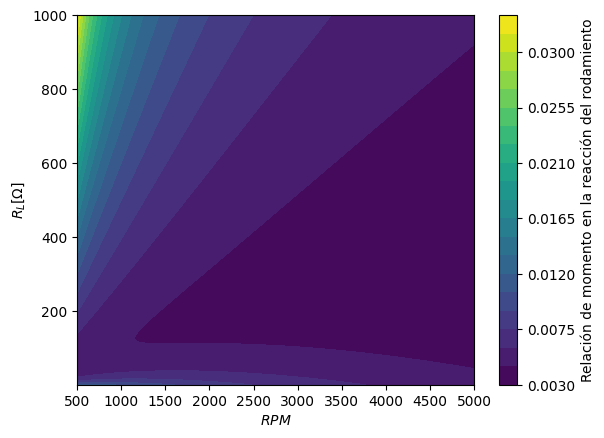

/usr/local/lib/python3.11/dist-packages/matplotlib/contour.py:1371: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmax = z.max().astype(float)
/usr/local/lib/python3.11/dist-packages/matplotlib/contour.py:1372: ComplexWarning: Casting complex values to real discards the imaginary part
  self.zmin = z.min().astype(float)
/usr/local/lib/python3.11/dist-packages/numpy/ma/core.py:2846: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,


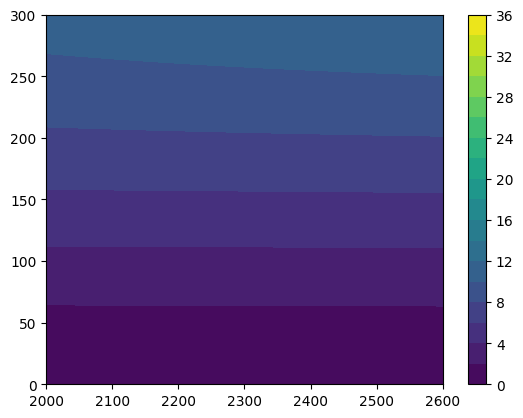

In [ ]:
#Torque arraqnue rodamiento skf 6006
F_r=9.81*1
d=30
D=55
S1=3.73e-3
dm=(d+D)/2
G_sl=S1*dm**-0.26*F_r**(5/3)
mu_sl=0.15
M_sl=G_sl*mu_sl
print(2*M_sl)

plt.contourf(RPM,R_L,M_sl/(T_motor*1e3),20)
plt.colorbar(label="Relación de momento en la reacción del rodamiento")
plt.xlabel(r"$RPM$")
plt.ylabel("$R_L [ \Omega]$")
plt.show()

plt.contourf(RPM,R_L,V_L,20)
plt.colorbar()
plt.xlim((2000,2600))
plt.ylim((0,300))
plt.show()

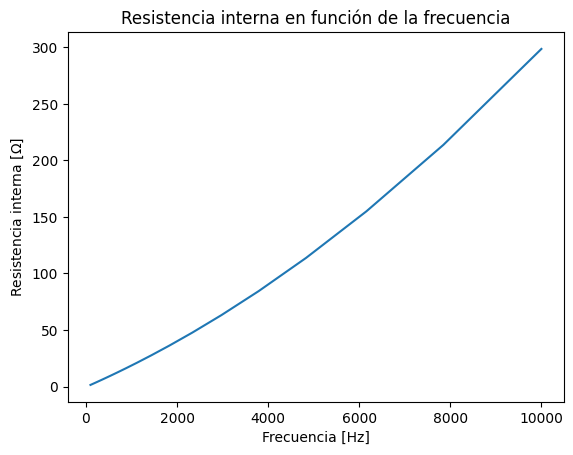

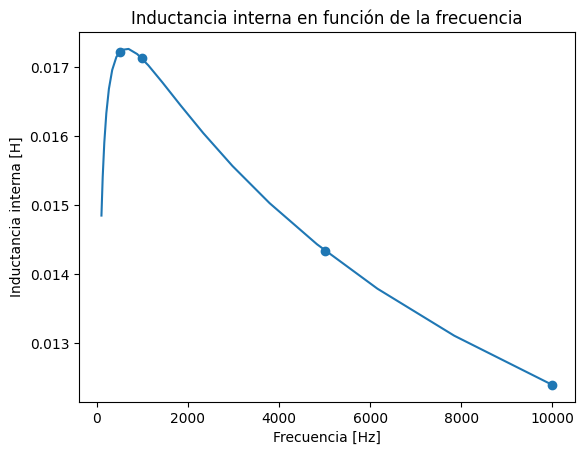

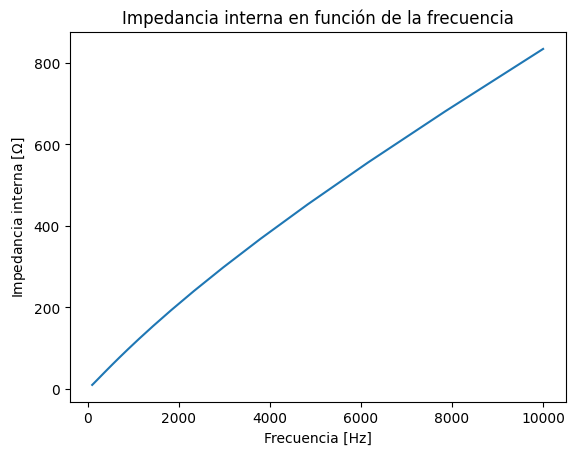

In [ ]:
f_rp_1=np.logspace(2,4,20)
plt.plot(f_rp_1,R_poly(f_rp_1))
plt.title("Resistencia interna en función de la frecuencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Resistencia interna [$\Omega$]")
plt.show()

plt.plot(f_rp_1,L_poly(f_rp_1))
plt.scatter(f_prueba,L_i)
plt.title("Inductancia interna en función de la frecuencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Inductancia interna [H]")
plt.show()

Z_abs=R_poly(f_rp_1)+1j*2*np.pi*f_rp_1*L_poly(f_rp_1)
plt.plot(f_rp_1,np.abs(Z_abs))
plt.title("Impedancia interna en función de la frecuencia")
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Impedancia interna [$\Omega$]")
plt.show()